In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
train = pd.read_csv('../input/titanic/train.csv')
test = pd.read_csv('../input/titanic/test.csv')

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
feature_numeric = train.select_dtypes(include=['int64','float64'])
feature_numeric.tail()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
886,887,0,2,27.0,0,0,13.00
887,888,1,1,19.0,0,0,30.00
888,889,0,3,NaN,1,2,23.45
889,890,1,1,26.0,0,0,30.00
890,891,0,3,32.0,0,0,7.75


# **Discret values¶**

In [5]:
discret_feature = [i for i in feature_numeric.columns if len(feature_numeric[i].unique())<20 and i not in ['PassengerId']]
discret_feature

['Survived', 'Pclass', 'SibSp', 'Parch']

**The bar chart's purpose is to have a clear vision between survived people and discret feature.**

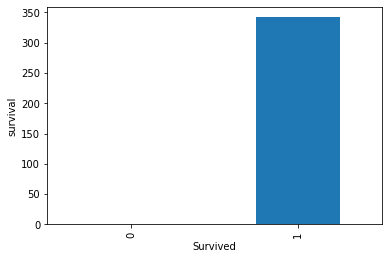

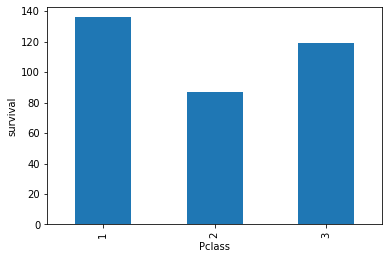

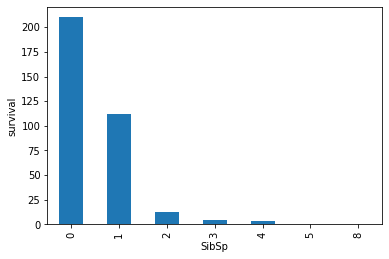

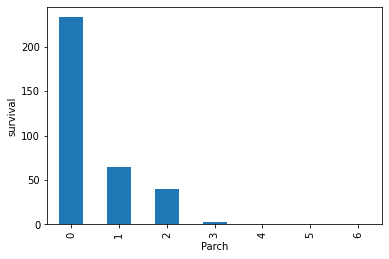

In [6]:
for i in discret_feature :
    data = feature_numeric.copy()
    data.groupby(i)['Survived'].sum().plot.bar()
    plt.xlabel(i)
    plt.ylabel('survival')
    plt.show()

# **Continuous features**

In [7]:
con_features = [i for i in feature_numeric.columns if i not in discret_feature+['PassengerId']]
con_features

['Age', 'Fare']

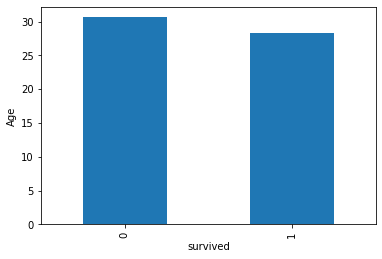

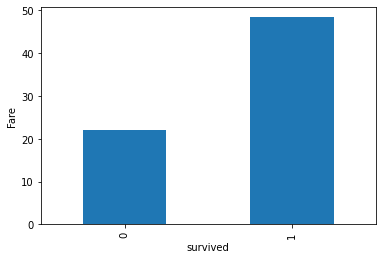

In [8]:
for i in con_features :
    data = feature_numeric.copy()
    data.groupby('Survived')[i].mean().plot.bar()
    plt.xlabel('survived')
    plt.ylabel(i)
    plt.show()